## Подготовка данных

### Изучение исходных данных

Загрузим данные и поверхностно с ними ознакомимся

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import catboost as cb

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [3]:
df_train = pd.read_csv('/content/gold_recovery_train_new.csv')
df_test = pd.read_csv('/content/gold_recovery_test_new.csv')
df_full = pd.read_csv('/content/gold_recovery_full_new.csv')

По условия задачи таблица `gold_recovery_full_new.csv` содержит первые две таблицы, поэтому не будем к ней обращаться, а будем оперировать только первыми двумя. Посмотрим, что в них находится

In [4]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Как и было сказано, вторая таблица не содержит "таргет", но почему-то разница в количестве столбцов существенная. Проверим отличия

In [6]:
list_1 = df_train.columns.to_list()
list_2 = df_test.columns.to_list()
dif = [x for x in list_1 + list_2 if x not in list_1 or x not in list_2] #сравнение двух списков
print(pd.Series(dif))

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

Так и есть, в таблице `test`нет таргетов (final.\*), а также других величин. Запомним данный список различий

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Как видно столбец с датой имеет не правильный формат, надо будет его исправить далее. Посмотим на количество и % пропусков

In [9]:
pd.set_option('display.max_rows', 100) # показ 100 строк

In [10]:
df_train.isna().agg(['sum', 'mean']).T

,sum,mean
date,0.0,0.000000
final.output.concentrate_ag,1.0,0.000071
final.output.concentrate_pb,1.0,0.000071
final.output.concentrate_sol,211.0,0.014913
final.output.concentrate_au,0.0,0.000000
final.output.recovery,0.0,0.000000
final.output.tail_ag,0.0,0.000000
final.output.tail_pb,100.0,0.007068
final.output.tail_sol,5.0,0.000353
final.output.tail_au,0.0,0.000000


In [11]:
df_test.isna().agg(['sum', 'mean']).T

,sum,mean
date,0.0,0.000000
primary_cleaner.input.sulfate,4.0,0.000756
primary_cleaner.input.depressant,5.0,0.000945
primary_cleaner.input.feed_size,0.0,0.000000
primary_cleaner.input.xanthate,4.0,0.000756
primary_cleaner.state.floatbank8_a_air,0.0,0.000000
primary_cleaner.state.floatbank8_a_level,0.0,0.000000
primary_cleaner.state.floatbank8_b_air,0.0,0.000000
primary_cleaner.state.floatbank8_b_level,0.0,0.000000
primary_cleaner.state.floatbank8_c_air,0.0,0.000000


Пропусков практически нет в двух таблицах, за ислючением 11% в столбце `secondary_cleaner.output.tail_sol` в таблице **train**. Чуть позже разберемся в их причине и попробуем исправить. Посмотрим на количество дубликатов.

In [12]:
display(df_train.duplicated().sum())
display(df_test.duplicated().sum())

0

0

Их нет. Двигаемся дальше.

### Провка расчета эффективности обогащения

Сделаем расчет эффективности обогащения руд и сравним их с уже рассчитаной эффективностью, посчитаем ошибку MAE.

Эффективность считается по формуле:

$$RECOVERY = \frac{C*(F-T)}{F*(C-T)}*100\%,$$
где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [13]:
df_train['rougher.output.recovery_calc'] = (
                                            (df_train['rougher.output.concentrate_au']*(df_train['rougher.input.feed_au']-df_train['rougher.output.tail_au']))/
                                            (df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au']-df_train['rougher.output.tail_au']))*
                                            100
                                           )

In [14]:
df_train[['rougher.output.recovery_calc', 'rougher.output.recovery']].head()

,rougher.output.recovery_calc,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


Расчет ошибки MAE:

In [15]:
recovery_mae = mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery_calc'])
print('Ошибка составляет =', round(recovery_mae, 2), 'или', 
      round(recovery_mae/df_train['rougher.output.recovery'].mean()*100, 2), '% от средней величины')

Ошибка составляет = 0.0 или 0.0 % от средней величины


### Анализ недоступных признаков в тестовой выборке. 

Теперь более тщательно посмотрим на разницу исходных таблиц

In [16]:
dif

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Если не брать в расчет столбцы, которые надо предсказать, то остальные столбцы по всей видимости заполняются после их анализа в лаборатории предприятия.

### Предобработка данных

Сначала изменим форматы даты в трех таблицах

In [17]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y.%m.%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y.%m.%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y.%m.%d %H:%M:%S') # тоже изменяем,позже пригодится

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

---

#### df_train

Попробуем исправить пропуски, для столбцов таргетов удалим все пропуски, потому что неважно чем мы их заполним, это отрицательно повлияет на обучение модели и способность предсказывать (на мой взгляд). Так же удалим все 0 значения в данных столбцах, так как такого быть не может и это ошибка ввода оператором.

In [19]:
list_final = ['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au']

In [20]:
list_to_delete = []
list_to_delete1 = []
for x in list_final:
    list_to_delete += (df_train[df_train[x].isna()].index.to_list())  #список для удаления пропусков
    list_to_delete1 += (df_train[df_train[x] == 0].index.to_list())   #список для удаления 0 значений
list_to_delete = set(list_to_delete + list_to_delete1) #исключаем повторы

In [21]:
df_train = df_train.drop(index=list_to_delete)

Проверим другие пропуски

In [22]:
df_train.isna().agg(['sum', 'mean']).T

,sum,mean
date,0.0,0.000000
final.output.concentrate_ag,0.0,0.000000
final.output.concentrate_pb,0.0,0.000000
final.output.concentrate_sol,0.0,0.000000
final.output.concentrate_au,0.0,0.000000
final.output.recovery,0.0,0.000000
final.output.tail_ag,0.0,0.000000
final.output.tail_pb,0.0,0.000000
final.output.tail_sol,0.0,0.000000
final.output.tail_au,0.0,0.000000


Составим список столбцов, где есть пропущенные значения. Далее пройдемся в цикле по нему и заполним пустые значения средним значением ближайших соседей (+-1 в обе строны), так как по условиям задачи сказано, что соседние по времени параметры часто похожи. Если соседних значений не будет, то интервал будет увеличиваться (+-2 и т.д.).

In [23]:
list_fill_na1 = df_train.loc[:, df_train.isna().sum() > 0].columns.to_list()

In [24]:
# закладку с изменением 0 сделал на будущее, не факт, что понадобится

def fill_neighbour (table, filling_list, fill_choose):
    table = table.reset_index(drop=True) # сброс индексов, чтобы корректно работал цикл ниже
    
    #Заполнение пропусков(изменение нулей) в каждом столбце ближайшими соседями
    for x in filling_list:
        list_index = []
        if fill_choose == 1:
            list_index = (table[table[x].isna()].index.to_list()) #для заполнения пропусков
        elif fill_choose == 2: 
            list_index = (table[table[x] == 0].index.to_list()) #для изменения 0 (фейковых данных)
        else:
            print('Неверное значение fill_choose')
            break
        for ind in list_index:
            right_ind = ind + 1
            left_ind = ind -1
            while np.isnan(table.loc[right_ind, x]): #если сосед НАН, то двигаемся правее
                right_ind += 1
            while np.isnan(table.loc[left_ind, x]): #если сосед НАН, то двигаемся левее
                left_ind -= 1
            table.loc[ind, x] = table.loc[[left_ind,right_ind], x].mean()
    return table

In [25]:
df_train = fill_neighbour(df_train, list_fill_na1, 1)

Проверка

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                13700 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         13700 non-null  float64       
 2   final.output.concentrate_pb                         13700 non-null  float64       
 3   final.output.concentrate_sol                        13700 non-null  float64       
 4   final.output.concentrate_au                         13700 non-null  float64       
 5   final.output.recovery                               13700 non-null  float64       
 6   final.output.tail_ag                                13700 non-null  float64       
 7   final.output.tail_pb                                13700 non-null  float64       
 8   final.

#### df_test

Займемся другой таблицей, пропусков в ней было не так много, применим прошлую функцию для заполнения пропусков.

In [27]:
list_fill_na2 = df_test.loc[:, df_test.isna().sum() > 0].columns.to_list()

In [28]:
df_test = fill_neighbour(df_test, list_fill_na2, 1)

Проверка

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

### Вывод

Осмотрели исходные данные, провели проверку расчета эффективности обогащения, подготовили данные для дальнейшего анализа

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим как менялась концентрация металлов изобразим это на графике, для этого создадим таблицу для простоты построения и восприятия. Возьмем среднее значение концентрации для каждого этапа очистки

In [30]:
concentrate_df = pd.DataFrame(columns=['metall', 'rougher', 'primary_cleaner', 'final'])

Для различных металлов

In [31]:
concentrate_df.loc[0]=['Au (Золото)', 
                       round(df_train['rougher.output.concentrate_au'].mean(), 2), 
                       round(df_train['primary_cleaner.output.concentrate_au'].mean(), 2),
                       round(df_train['final.output.concentrate_au'].mean(), 2)]

In [32]:
concentrate_df.loc[1]=['Ag (Серебро)', 
                       round(df_train['rougher.output.concentrate_ag'].mean(), 2), 
                       round(df_train['primary_cleaner.output.concentrate_ag'].mean(), 2),
                       round(df_train['final.output.concentrate_ag'].mean(), 2)]

In [33]:
concentrate_df.loc[2]=['Pb (Свинец)', 
                       round(df_train['rougher.output.concentrate_pb'].mean(), 2), 
                       round(df_train['primary_cleaner.output.concentrate_pb'].mean(), 2),
                       round(df_train['final.output.concentrate_pb'].mean(), 2)]

In [34]:
concentrate_df.head()

,metall,rougher,primary_cleaner,final
0,Au (Золото),19.49,32.46,44.21
1,Ag (Серебро),11.76,8.24,5.14
2,Pb (Свинец),7.69,9.67,10.21


График

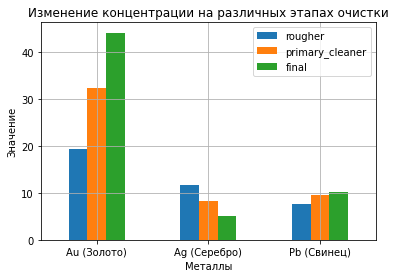

In [35]:
concentrate_df.plot(kind='bar')
plt.title('Изменение концентрации на различных этапах очистки')
plt.xlabel('Металлы')
plt.ylabel('Значение')
plt.xticks(range(len(concentrate_df['metall'])), labels=concentrate_df['metall'], rotation=0)
plt.grid()
plt.show()

Как видно из графика, производство эффективное, концентрация золота стремительно растет после каждого этапа очистки. Странно, что для серебра концентрация падает, наверное это связано с технологией обогощения золота. Концентрация другого сопутствующего металла - Свинца, также растет после каждого этапа очистки.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Построим графики распределения размеров гранул сырья

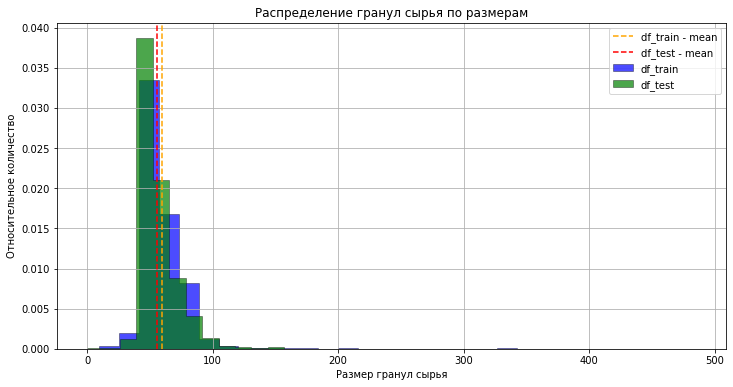

Средний размер для выборки train: 60.003700349620956 (пунктирная оранжевая линия)
Средний размер для выборки test: 55.95283531239522 (пунктирная красная линия)


In [36]:
def plot_hist(ax, values, color, label):
    ax.hist(values, histtype="stepfilled", bins=30, alpha=0.7, density=True,
           linewidth=0.5, edgecolor='black', color=color, label=label)


fig, ax = plt.subplots()
fig.set_size_inches(12,6)
plot_hist(ax, df_train['rougher.input.feed_size'], 'blue', 'df_train')
plot_hist(ax, df_test['rougher.input.feed_size'], 'green', 'df_test')

plt.xlabel('Размер гранул сырья')
plt.ylabel('Относительное количество')
plt.title('Распределение гранул сырья по размерам')
plt.axvline(x=df_train['rougher.input.feed_size'].mean(), linestyle='--', color='orange', label='df_train - mean') #means
plt.axvline(x=df_test['rougher.input.feed_size'].mean(), linestyle='--', color='red', label='df_test - mean')
plt.legend(frameon=True)
plt.grid(True)
plt.show()

#Text
print("Средний размер для выборки train:", df_train['rougher.input.feed_size'].mean(), '(пунктирная оранжевая линия)')
print("Средний размер для выборки test:", df_test['rougher.input.feed_size'].mean(), '(пунктирная красная линия)')

Как видно из графика, средние размеры гранул сырья довольно похожи, как и распределения для тестовой и тренировочной выборок. В тестовой выборке чуть меньше размеры гранул, и их больше. Так же присутствуют выбросы в обоих выборках, которые предлагается заменить средним значением для каждой выборки.

Сначала определимся с граничными значениями для каждой выборки, руководствоваться будем правилом трех сигм

In [37]:
def three_sigma(series):
    return list([round(series.mean() - 3 * series.std(), 2), round(series.mean() + 3 * series.std(), 2)])

In [38]:
list_range_feed_train = three_sigma(df_train['rougher.input.feed_size'])
list_range_feed_test = three_sigma(df_test['rougher.input.feed_size'])

print('Для выборки train =', list_range_feed_train[0], '-', list_range_feed_train[1])
print('Для выборки test  =', list_range_feed_test[0], '-', list_range_feed_test[1])

Для выборки train = -9.99 - 130.0
Для выборки test  = -1.29 - 113.19


Так как отрицательных значений нет, и у нас выбросы только справой стороны графика, то задача будет чуточку легче.

In [39]:
new_mean_feed_train = df_train.loc[df_train['rougher.input.feed_size'] < list_range_feed_train[1], 'rougher.input.feed_size'].mean()
new_mean_feed_test = df_test.loc[df_test['rougher.input.feed_size'] < list_range_feed_test[1], 'rougher.input.feed_size'].mean()

In [40]:
df_train.loc[df_train['rougher.input.feed_size'] > list_range_feed_train[1], 'rougher.input.feed_size'] = new_mean_feed_train
df_test.loc[df_test['rougher.input.feed_size'] > list_range_feed_test[1], 'rougher.input.feed_size'] = new_mean_feed_test

Построим заново графики распределения размеров гранул

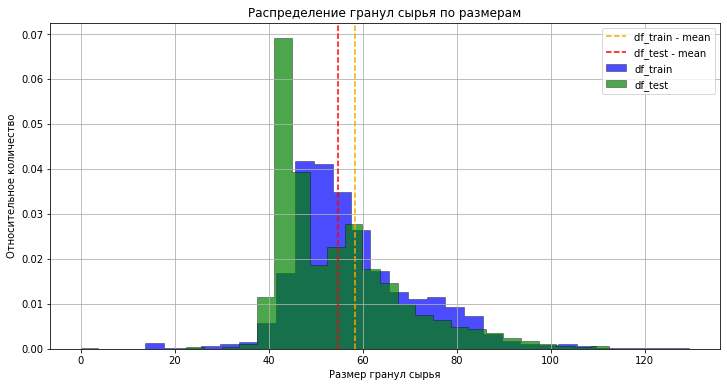

Средний размер для выборки train: 58.33255434831147 (пунктирная оранжевая линия)
Средний размер для выборки test: 54.83843688802501 (пунктирная красная линия)


In [41]:
def plot_hist(ax, values, color, label):
    ax.hist(values, histtype="stepfilled", bins=30, alpha=0.7, density=True,
           linewidth=0.5, edgecolor='black', color=color, label=label)


fig, ax = plt.subplots()
fig.set_size_inches(12,6)
plot_hist(ax, df_train['rougher.input.feed_size'], 'blue', 'df_train')
plot_hist(ax, df_test['rougher.input.feed_size'], 'green', 'df_test')

plt.xlabel('Размер гранул сырья')
plt.ylabel('Относительное количество')
plt.title('Распределение гранул сырья по размерам')
plt.axvline(x=df_train['rougher.input.feed_size'].mean(), linestyle='--', color='orange', label='df_train - mean') #means
plt.axvline(x=df_test['rougher.input.feed_size'].mean(), linestyle='--', color='red', label='df_test - mean')
plt.legend(frameon=True)
plt.grid(True)
plt.show()

#Text
print("Средний размер для выборки train:", df_train['rougher.input.feed_size'].mean(), '(пунктирная оранжевая линия)')
print("Средний размер для выборки test:", df_test['rougher.input.feed_size'].mean(), '(пунктирная красная линия)')

Уже на много лучше, но все равно вызывает большой вопрос в тестовой выборке большое количество значений около 45. Оставим эту доставерность на совесть заказчика.

### Исследование суммарной концентрацию всех веществ на разных стадиях

Создадим таблицу для суммарной концентрации и построения графиков

In [42]:
def total_conc(table):
    total_concentrate = pd.DataFrame()
    total_concentrate['feed_train'] = (table['rougher.input.feed_ag'] + 
                                      table['rougher.input.feed_pb'] + 
                                      table['rougher.input.feed_sol'] + 
                                      table['rougher.input.feed_au'])
    total_concentrate['rougher_train'] = (table['rougher.output.concentrate_ag'] + 
                                      table['rougher.output.concentrate_pb'] + 
                                      table['rougher.output.concentrate_sol'] + 
                                      table['rougher.output.concentrate_au'])
    total_concentrate['primary_cleaner_train'] = (table['primary_cleaner.output.concentrate_ag'] + 
                                              table['primary_cleaner.output.concentrate_pb'] + 
                                              table['primary_cleaner.output.concentrate_sol'] + 
                                              table['primary_cleaner.output.concentrate_au'])
    total_concentrate['final_cleaner_train'] = (table['final.output.concentrate_ag'] + 
                                              table['final.output.concentrate_pb'] + 
                                              table['final.output.concentrate_sol'] + 
                                              table['final.output.concentrate_au'])
    return total_concentrate

In [43]:
conc_train = total_conc(df_train)

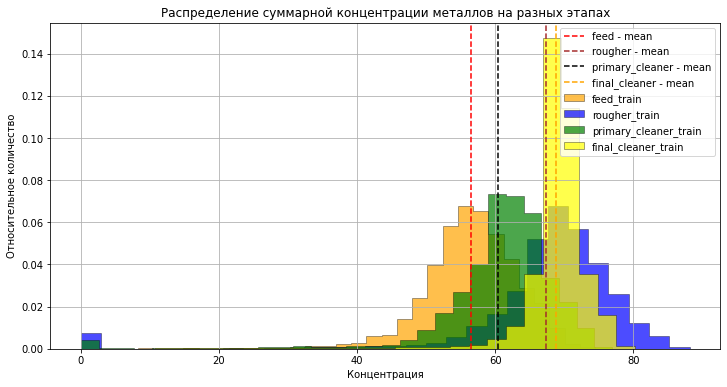

In [44]:
def plot_hist(ax, values, color, label):
    ax.hist(values, histtype="stepfilled", bins=30, alpha=0.7, density=True,
           linewidth=0.5, edgecolor='black', color=color, label=label)


fig, ax = plt.subplots()
fig.set_size_inches(12,6)
plot_hist(ax, conc_train['feed_train'], 'orange', 'feed_train')
plot_hist(ax, conc_train['rougher_train'], 'blue', 'rougher_train')
plot_hist(ax, conc_train['primary_cleaner_train'], 'green', 'primary_cleaner_train')
plot_hist(ax, conc_train['final_cleaner_train'], 'yellow', 'final_cleaner_train')

plt.xlabel('Концентрация')
plt.ylabel('Относительное количество')
plt.title('Распределение суммарной концентрации металлов на разных этапах')
#means
plt.axvline(x=conc_train['feed_train'].mean(), linestyle='--', color='red', label='feed - mean')
plt.axvline(x=conc_train['rougher_train'].mean(), linestyle='--', color='brown', label='rougher - mean')
plt.axvline(x=conc_train['primary_cleaner_train'].mean(), linestyle='--', color='black', label='primary_cleaner - mean')
plt.axvline(x=conc_train['final_cleaner_train'].mean(), linestyle='--', color='orange', label='final_cleaner - mean')

plt.legend(frameon=True)
plt.grid(True)
plt.show()


Очень сильно смущают данные для этапов **rougher_train & primary_cleaner_train**. А если взять в расчет, что мы дополнительно показали на графике загружаемое сырье (оранжевый цвет), и в нем нет 0 значений, значит это ошибки при вводе данных. Предлагается их заменить средним, как мы делали ранее. Так же очень странно, что средняя итоговая концентрация после этапа Флотации выше, чем после этапа первичной очистки. И потом резкий рост после второй стадии очистки. Предположительно это связано с технологией обогащения.

Аналогично посчитаем допустимый диапазон в 3 сигмы для каждого этапа каждому металлу, дополнительно изменим данные для загружаемого сырья, и финальных результатов.

In [45]:
list_for_change = ['rougher.input.feed_ag',
                   'rougher.input.feed_pb',
                   'rougher.input.feed_sol',
                   'rougher.input.feed_au',
                   'rougher.output.concentrate_ag',
                   'rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_sol',
                   'rougher.output.concentrate_au',
                   'primary_cleaner.output.concentrate_ag',
                   'primary_cleaner.output.concentrate_pb',
                   'primary_cleaner.output.concentrate_sol',
                   'primary_cleaner.output.concentrate_au',
                   'final.output.concentrate_ag',
                   'final.output.concentrate_pb',
                   'final.output.concentrate_sol',
                   'final.output.concentrate_au']

In [46]:
list_range_conc = []
for x in list_for_change:
    list_range_conc.append(three_sigma(df_train[x])) # список диапазонов
    print('Для ',x, '3 sigma = ',list_range_conc[-1])
    df_train.loc[df_train[x] < list_range_conc[-1][0], x] = df_train.loc[df_train[x] > list_range_conc[-1][0], x].mean()

Для  rougher.input.feed_ag 3 sigma =  [2.92, 14.29]
Для  rougher.input.feed_pb 3 sigma =  [0.37, 6.73]
Для  rougher.input.feed_sol 3 sigma =  [21.95, 50.87]
Для  rougher.input.feed_au 3 sigma =  [2.39, 13.49]
Для  rougher.output.concentrate_ag 3 sigma =  [3.64, 19.88]
Для  rougher.output.concentrate_pb 3 sigma =  [2.18, 13.19]
Для  rougher.output.concentrate_sol 3 sigma =  [10.31, 46.53]
Для  rougher.output.concentrate_au 3 sigma =  [8.23, 30.75]
Для  primary_cleaner.output.concentrate_ag 3 sigma =  [2.42, 14.06]
Для  primary_cleaner.output.concentrate_pb 3 sigma =  [1.81, 17.53]
Для  primary_cleaner.output.concentrate_sol 3 sigma =  [-2.14, 22.22]
Для  primary_cleaner.output.concentrate_au 3 sigma =  [16.14, 48.79]
Для  final.output.concentrate_ag 3 sigma =  [1.2, 9.07]
Для  final.output.concentrate_pb 3 sigma =  [5.73, 14.68]
Для  final.output.concentrate_sol 3 sigma =  [1.04, 17.47]
Для  final.output.concentrate_au 3 sigma =  [32.39, 56.03]


Проверка

In [47]:
conc_train = total_conc(df_train)

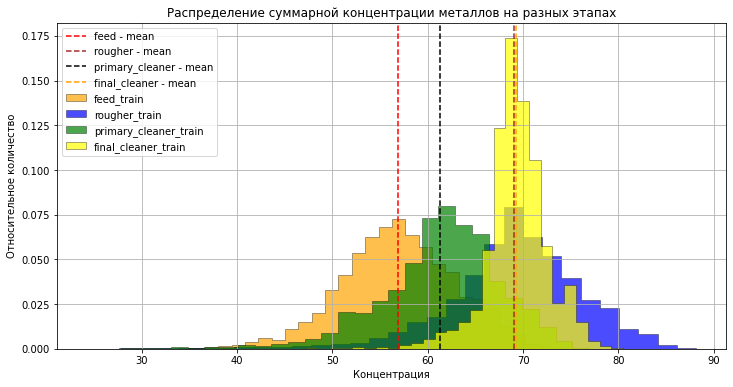

In [48]:
def plot_hist(ax, values, color, label):
    ax.hist(values, histtype="stepfilled", bins=30, alpha=0.7, density=True,
           linewidth=0.5, edgecolor='black', color=color, label=label)


fig, ax = plt.subplots()
fig.set_size_inches(12,6)
plot_hist(ax, conc_train['feed_train'], 'orange', 'feed_train')
plot_hist(ax, conc_train['rougher_train'], 'blue', 'rougher_train')
plot_hist(ax, conc_train['primary_cleaner_train'], 'green', 'primary_cleaner_train')
plot_hist(ax, conc_train['final_cleaner_train'], 'yellow', 'final_cleaner_train')

plt.xlabel('Концентрация')
plt.ylabel('Относительное количество')
plt.title('Распределение суммарной концентрации металлов на разных этапах')
#means
plt.axvline(x=conc_train['feed_train'].mean(), linestyle='--', color='red', label='feed - mean')
plt.axvline(x=conc_train['rougher_train'].mean(), linestyle='--', color='brown', label='rougher - mean')
plt.axvline(x=conc_train['primary_cleaner_train'].mean(), linestyle='--', color='black', label='primary_cleaner - mean')
plt.axvline(x=conc_train['final_cleaner_train'].mean(), linestyle='--', color='orange', label='final_cleaner - mean')

plt.legend(frameon=True)
plt.grid(True)
plt.show()

Так на много лучше выглядит. По данному графику видно, как улучшалась общая концентарция металлов в руде после каждого этапа. После последней очистки средняя концентрация осталось такой же, как и была до, но зато уменьшился ее разброс, руда стала более "насыщенной" или концентрированной =)

### Вывод

Благодаря анализу данных удалось выявить выбросы в данных и исправить их. Что положительно скажется на предсказательной способности нашей будущей модели. Выбором модели займемся в следующем пункте.

## Модель

### Последняя подготовка данных

Нужно выделить данные(признаки) для обучения и разделить выборку для обучения на тренировочную и валидационную. Тестовая выборка дана уже почти готовой.

In [49]:
list_to_drop = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 
                'final.output.concentrate_au', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol',
                'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 
                'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au',
                'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 
                'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 
                'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed',
                'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.tail_ag', 
                'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 
                'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol',
                'secondary_cleaner.output.tail_au', 'rougher.output.recovery_calc', 'date']

In [50]:
df_train_temp = df_train.drop(list_to_drop, axis=1)

In [51]:
df_train_1, df_valid = train_test_split(df_train_temp, test_size=0.25, random_state=101)

Делим выборки на признаки и таргеты

In [52]:
features_train = df_train_1.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = df_train_1[['rougher.output.recovery', 'final.output.recovery']]

In [53]:
features_valid = df_valid.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_valid = df_valid[['rougher.output.recovery', 'final.output.recovery']]

Так как `df_test` таблица не содержит **target**, их надо взять из таблицы `df_full`, сопоставив их по дате. Не забыв, сбросить индексы и удалить колонку с датой

In [54]:
df_test_temp = df_test
df_test_temp = df_test_temp.set_index('date')
df_full = df_full.set_index('date')
new_df = df_full.loc[df_test_temp.index]

In [55]:
features_test = df_test
target_test = new_df[['rougher.output.recovery', 'final.output.recovery']]

Сбрасываем во всех таблицах индексы

In [56]:
features_train = features_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
features_valid = features_valid.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)
features_test = features_test.reset_index(drop=True).drop(['date'], axis=1)
target_test = target_test.reset_index(drop=True)

Проверка

In [57]:
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)

(10275, 52)

(10275, 2)

(3425, 52)

(3425, 2)

(5290, 52)

(5290, 2)

### Функция для вычисления итоговой sMAPE

По условию задачи надо использовать метрику, предоставленную Заказчиком, напишем функцию для вычисления нашей метрики качества

In [58]:
def smape_value(targets, predictions):
    smape_0 = ((abs(targets['rougher.output.recovery'] - predictions[0]) / 
                ((abs(targets['rougher.output.recovery']) + abs(predictions[0])) / 2)).mean() * 100)
    smape_1 = ((abs(targets['final.output.recovery'] - predictions[1]) / 
                ((abs(targets['final.output.recovery']) + abs(predictions[1])) / 2)).mean() * 100)
    return (0.25*smape_0 + 0.75*smape_1)

### Выбор моделей

Рассмотрим как справятся с предсказанием две различных модели, пойдем от простого к сложному:
* Линейная регрессия
* Градиентный бустинг в лице Catboost (рассмотрим два варианта)

#### LinearRegression

Создадим и обучим модель

In [59]:
model_1 = LinearRegression().fit(features_train, target_train)

In [60]:
predict_1 = model_1.predict(features_valid)

Результаты занесем в созданную табличку

In [61]:
result_df = pd.DataFrame(columns=['model', 'final_smape'])

In [62]:
result_df.loc[0]=['LinearRegression_valid', round(smape_value(target_valid, pd.DataFrame(predict_1)), 2)]

In [63]:
result_df

,model,final_smape
0,LinearRegression_valid,8.24


#### CatBoost - MultiRMSE

Рассмотрим следующую модель, в этом пункте будем на вход подавать мульти таргет, и предсказания получим тоже мульти. Модель в этом случае будет Одна.

In [64]:
model_2 = cb.CatBoostRegressor(random_seed=101, 
                                 iterations=200, 
                                 learning_rate=0.15, 
                                 early_stopping_rounds=20, 
                                 loss_function = 'MultiRMSE',
                                 silent=True)

model_2.fit(features_train, target_train, eval_set=(features_valid, target_valid))

params = model_2.get_params()

cv_data = cb.cv(
    params=params,
    pool=cb.Pool(features_train, target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем данные
    partition_random_seed=101,
)

Training on fold [0/5]

bestTest = 12.45403796
bestIteration = 198

Training on fold [1/5]

bestTest = 10.68148024
bestIteration = 199

Training on fold [2/5]

bestTest = 10.9967121
bestIteration = 199

Training on fold [3/5]

bestTest = 11.42773145
bestIteration = 198

Training on fold [4/5]

bestTest = 11.80101849
bestIteration = 199



In [65]:
predict_2 = model_2.predict(features_valid)

In [66]:
result_df.loc[1]=['Catboost_valid', round(smape_value(target_valid, pd.DataFrame(predict_2)), 2)]

In [67]:
result_df

,model,final_smape
0,LinearRegression_valid,8.24
1,Catboost_valid,6.71


6,71% уже лучше, посмотрим что нам покажет Catboost при разделении предсказаний

#### CatBoost - RMSE

В этом пункте, мы обучим две модели. Каждая будет предсказывать свой собственный таргет. Но сначала надо разделить таргеты.

In [68]:
target_train_2_1 = target_train['rougher.output.recovery']
target_valid_2_1 = target_valid['rougher.output.recovery']
target_train_2_2 = target_train['final.output.recovery']
target_valid_2_2 = target_valid['final.output.recovery']

In [69]:
model_2_1 = cb.CatBoostRegressor(random_seed=101, 
                                 iterations=200, 
                                 learning_rate=0.15, 
                                 early_stopping_rounds=20, 
                                 loss_function = 'RMSE',
                                 silent=True)

model_2_1.fit(features_train, target_train_2_1, eval_set=(features_valid, target_valid_2_1))

params = model_2_1.get_params()

cv_data = cb.cv(
    params=params,
    pool=cb.Pool(features_train, target_train_2_1),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем данные
    partition_random_seed=101,
)

Training on fold [0/5]

bestTest = 10.74634342
bestIteration = 191

Training on fold [1/5]

bestTest = 9.032360566
bestIteration = 199

Training on fold [2/5]

bestTest = 9.153135502
bestIteration = 198

Training on fold [3/5]

bestTest = 9.670319563
bestIteration = 193

Training on fold [4/5]

bestTest = 9.822778682
bestIteration = 189



In [70]:
predict_2_1 = model_2_1.predict(features_valid)
predict_2_1 = pd.Series(predict_2_1)

Теперь для второго таргета обучим модель и предскажем значения

In [71]:
model_2_2 = cb.CatBoostRegressor(random_seed=101, 
                                 iterations=200, 
                                 learning_rate=0.15, 
                                 early_stopping_rounds=20, 
                                 loss_function = 'RMSE',
                                 silent=True)

model_2_2.fit(features_train, target_train_2_2, eval_set=(features_valid, target_valid_2_2))

params = model_2_2.get_params()

cv_data = cb.cv(
    params=params,
    pool=cb.Pool(features_train, target_train_2_2),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем данные
    partition_random_seed=101,
)

Training on fold [0/5]

bestTest = 5.741917306
bestIteration = 199

Training on fold [1/5]

bestTest = 5.292906235
bestIteration = 198

Training on fold [2/5]

bestTest = 5.486162282
bestIteration = 191

Training on fold [3/5]

bestTest = 5.687514383
bestIteration = 199

Training on fold [4/5]

bestTest = 5.662232082
bestIteration = 199



In [72]:
predict_2_2 = model_2_2.predict(features_valid)
predict_2_2 = pd.Series(predict_2_2)

Объеденим предсказания и посчитаем требуемую метрику

In [73]:
predict_2_total = pd.DataFrame(predict_2_1)
predict_2_total[1] = predict_2_2

In [74]:
result_df.loc[2]=['2xCatboost_valid', round(smape_value(target_valid, predict_2_total), 2)]

In [75]:
result_df

,model,final_smape
0,LinearRegression_valid,8.24
1,Catboost_valid,6.71
2,2xCatboost_valid,6.35


Как видно MultipleTargets дает хуже результат.

### Проверка лучшей модели на тестовой выборке

Сделаем аналогично - предсказания для разделеных таргетов, и их объединение.

In [76]:
predict_3_1 = model_2_1.predict(features_test)
predict_3_1 = pd.Series(predict_3_1)

In [77]:
predict_3_2 = model_2_2.predict(features_test)
predict_3_2 = pd.Series(predict_3_2)

In [78]:
predict_3_total = pd.DataFrame(predict_3_1)
predict_3_total[1] = predict_3_2

In [79]:
result_df.loc[3]=['2xCatboost_test', round(smape_value(target_test, predict_3_total), 2)]

In [80]:
result_df

,model,final_smape
0,LinearRegression_valid,8.24
1,Catboost_valid,6.71
2,2xCatboost_valid,6.35
3,2xCatboost_test,9.40


Показатель ухудшился, скорее всего из-за того, что в таблице `df_full` в таргетах присутствуют 0, что портит нам предсказательную способность наших моделей, так как 0 и пропуски в тренировочной выборке мы удалили. Проверим это

In [81]:
list_to_delete = []
list_to_delete1 = []
list_check = ['rougher.output.recovery', 'final.output.recovery']
for x in list_check:
    list_to_delete += (target_test[target_test[x].isna()].index.to_list())  #список для удаления пропусков
    list_to_delete1 += (target_test[target_test[x] == 0].index.to_list())   #список для удаления 0 значений
list_to_delete = set(list_to_delete + list_to_delete1) #исключаем повторы
target_test.loc[list_to_delete, list_check].shape

(136, 2)

136 - не правильных данных =( Достоверность данных снова оставим на совести Заказчика. Придется заново создавать данную таблицу таргетов из таблицы `df_full` и признаков из таблицы `df_test`. Как мы это сделаем, у нас осталась таблица `df_test_temp` с индексами времени, а так же таблица `df_full` с индексами времени. Сначала "укоротим" таблицу ФУЛЛ, а далее ее проверим на 0 и пропуски. И уже из нее сделаем таблицу таргетов

In [82]:
df_full_temp = df_full.loc[df_test_temp.index, :]

In [83]:
list_to_delete = []
list_to_delete1 = []
list_check = ['rougher.output.recovery', 'final.output.recovery']
for x in list_check:
    list_to_delete += (df_full_temp[df_full_temp[x].isna()].index.to_list())  #список для удаления пропусков
    list_to_delete1 += (df_full_temp[df_full_temp[x] == 0].index.to_list())   #список для удаления 0 значений
list_to_delete = set(list_to_delete + list_to_delete1) #исключаем повторы
df_full_temp.loc[list_to_delete, list_check].shape

(136, 2)

In [84]:
df_test_temp = df_test_temp.drop(index=list_to_delete)
df_full_temp = df_full_temp.drop(index=list_to_delete)

Сбрасываем во всех таблицах индексы

In [85]:
features_test = df_test_temp.reset_index(drop=True)
target_test = df_full_temp[list_check].reset_index(drop=True)

Проверка

In [86]:
display(features_test.shape)
display(target_test.shape)

(5154, 52)

(5154, 2)

Проверка нового результата на модели

In [87]:
predict_4_1 = model_2_1.predict(features_test)
predict_4_1 = pd.Series(predict_4_1)

In [88]:
predict_4_2 = model_2_2.predict(features_test)
predict_4_2 = pd.Series(predict_4_2)

In [89]:
predict_4_total = pd.DataFrame(predict_4_1)
predict_4_total[1] = predict_4_2

In [90]:
result_df.loc[4]=['2xCatboost_final', round(smape_value(target_test, predict_4_total), 2)]

In [91]:
result_df

,model,final_smape
0,LinearRegression_valid,8.24
1,Catboost_valid,6.71
2,2xCatboost_valid,6.35
3,2xCatboost_test,9.40
4,2xCatboost_final,7.38


На 2 пункта удалось уменьшить итоговое значение метрики, не фонтан, но тоже отличный вариант.


### Проверка модели на адекватность

Проверим на сколько хороша, построенная нами модель. Сравнивать ее будем с болванкой

In [92]:
dummy_regressor_rougher = DummyRegressor(strategy="mean")
dummy_regressor_rougher.fit(features_train, target_train)
predict_5 = pd.DataFrame(dummy_regressor_rougher.predict(features_test))
result_df.loc[5]=['DummyReg_test', round(smape_value(target_test, predict_5), 2)]

In [93]:
result_df

,model,final_smape
0,LinearRegression_valid,8.24
1,Catboost_valid,6.71
2,2xCatboost_valid,6.35
3,2xCatboost_test,9.40
4,2xCatboost_final,7.38
5,DummyReg_test,8.02


### Вывод

С помощью машинного удаления удалось сделать предсказания для текущих данных, посчитали метрику, согласно заданию. Лучшая модель показывает результат в 7,38 % на тестовых данных, что лучше чем болванка. 

## Общий Вывод

В ходе работы были изучены сырые данные. Была произведена проверка данных, заполнение пропусков, и в ходе анализа выявили дополнительные аномальные места(слишком большой размер гранул и 0 значения концентраций). С помощью машинного обучения научились предсказывать значения эффективности обогащения чернового концентрата и финального концентрата с ошибкой в 7,38%, что на мой взгляд является хорошим результатом.